### Web Scraping all the Analytics Vidhya Articles in 2019

In [1]:
import requests

In [51]:
!pip install fake-useragent

In [2]:
from fake_useragent import UserAgent
user_agent = UserAgent()

In [3]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup

In [4]:
articles_link=[]
articles_title=[]
news_contents = []
for i in range(18):
    # Range 18 denotes there are 18 pages so it will iterate through every page adn find articles and then move into next
    link= f'https://www.analyticsvidhya.com/blog/2019/page/{i+1}/'
    # {i+1} usually at every page the url shows the page number
    page = requests.get(link ,headers={'user-agent':user_agent.chrome})
    soup = BeautifulSoup(page.content)
    page.close()
    link_title=soup.find_all("h3",{"class":"entry-title"})
    for item in link_title:
        link1=re.search(r"<a href=.*rel=",str(item))
        if link1 is not None:
            article_link=re.sub('<a href="','',re.sub('" rel=','',link1.group()))
        else:
            article_link=None
        articles_link.append(article_link)  
        
        title=re.search(r".*</a>",str(item))
        if title is not None:
            article_name=re.sub(" </a>","",title.group())
        else:
            article_name=None

        articles_title.append(article_name)
        
        article = requests.get(article_link)
        article_content = article.content
        soup_article = BeautifulSoup(article_content)
        body = soup_article.find_all('div', class_='text-content')
        x = body[0].find_all('p')
        list_paragraphs = []
        for p in np.arange(0, len(x)):
            paragraph = x[p].get_text()
            list_paragraphs.append(paragraph)
            final_article = " ".join(list_paragraphs)
        news_contents.append(final_article)

In [5]:
articles_df3=pd.DataFrame({"Article_Link":articles_link,"Article_Title":articles_title,"Content":news_contents})

In [6]:
articles_df3.head()

,Article_Link,Article_Title,Content
0,https://www.analyticsvidhya.com/blog/2019/12/5...,5 Key Reasons Why Data Scientists Are Quitting...,The stock of a data scientist is at an all-tim...
1,https://www.analyticsvidhya.com/blog/2019/12/f...,5 Weird and Hilarious Uses of Data Science,“Ripley’s Believe or Not” features some of the...
2,https://www.analyticsvidhya.com/blog/2019/12/2...,2019 In-Review and Trends for 2020 – A Technic...,2020 is almost upon us! It’s time to welcome...
3,https://www.analyticsvidhya.com/blog/2019/12/3...,30 Challenging Open Source Data Science Projec...,When was the last time you took up a data sc...
4,https://www.analyticsvidhya.com/blog/2019/12/2...,20 Most Popular Machine Learning and Deep Lear...,High-quality machine learning and deep learnin...


In [7]:
articles_df3.shape

(248, 3)

In [8]:
articles_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Article_Link   248 non-null    object
 1   Article_Title  248 non-null    object
 2   Content        248 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [9]:
articles=articles_df3.copy()

In [10]:
articles_df3["Content"]=articles_df3["Content"].str.replace(u'\xa0', ' ')

In [11]:
articles_df3.head()

,Article_Link,Article_Title,Content
0,https://www.analyticsvidhya.com/blog/2019/12/5...,5 Key Reasons Why Data Scientists Are Quitting...,The stock of a data scientist is at an all-tim...
1,https://www.analyticsvidhya.com/blog/2019/12/f...,5 Weird and Hilarious Uses of Data Science,“Ripley’s Believe or Not” features some of the...
2,https://www.analyticsvidhya.com/blog/2019/12/2...,2019 In-Review and Trends for 2020 – A Technic...,2020 is almost upon us! It’s time to welcome...
3,https://www.analyticsvidhya.com/blog/2019/12/3...,30 Challenging Open Source Data Science Projec...,When was the last time you took up a data sc...
4,https://www.analyticsvidhya.com/blog/2019/12/2...,20 Most Popular Machine Learning and Deep Lear...,High-quality machine learning and deep learnin...


In [12]:
from nltk.tokenize import word_tokenize

In [13]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [14]:

def tok(x): 
    tokenizer = RegexpTokenizer(r'\w+')

    return tokenizer.tokenize(x)


In [15]:
articles_df3["Content_1"]=articles_df3["Content"].apply(tok)

In [16]:
articles_df3.head()

,Article_Link,Article_Title,Content,Content_1
0,https://www.analyticsvidhya.com/blog/2019/12/5...,5 Key Reasons Why Data Scientists Are Quitting...,The stock of a data scientist is at an all-tim...,"[The, stock, of, a, data, scientist, is, at, a..."
1,https://www.analyticsvidhya.com/blog/2019/12/f...,5 Weird and Hilarious Uses of Data Science,“Ripley’s Believe or Not” features some of the...,"[Ripley, s, Believe, or, Not, features, some, ..."
2,https://www.analyticsvidhya.com/blog/2019/12/2...,2019 In-Review and Trends for 2020 – A Technic...,2020 is almost upon us! It’s time to welcome...,"[2020, is, almost, upon, us, It, s, time, to, ..."
3,https://www.analyticsvidhya.com/blog/2019/12/3...,30 Challenging Open Source Data Science Projec...,When was the last time you took up a data sc...,"[When, was, the, last, time, you, took, up, a,..."
4,https://www.analyticsvidhya.com/blog/2019/12/2...,20 Most Popular Machine Learning and Deep Lear...,High-quality machine learning and deep learnin...,"[High, quality, machine, learning, and, deep, ..."


In [17]:
articles_df3["Content"][1]

'“Ripley’s Believe or Not” features some of the weirdest and most bizarre facts from around the world. How about creating our own Ripley’s Hall of Fame for Data Science applications? Think about it – what’s the first thought that comes to your mind when you think about Data Science? It’s usually all about techniques, algorithms, programming, among other things. Here’s what I’m proposing – how about we explore the road less traveled? Yes – I’m talking about embracing the weird and fun part of data science!  In this weird and wacky world, our data science work reflects surprising connections, such as – if you are buying diapers then you are most likely to buy beer. Or, people who go to bars are a higher credit risk! Oh, I cannot miss out on this one – Smart people prefer curly fries. Liking “Curly Fries” on Facebook is a decent predictor of high intelligence! So in this article, let’s take this roller coaster ride into the fun-world of data science and its weird and hilarious application

In [18]:
articles_df3["Content_1"][1]

['Ripley',
 's',
 'Believe',
 'or',
 'Not',
 'features',
 'some',
 'of',
 'the',
 'weirdest',
 'and',
 'most',
 'bizarre',
 'facts',
 'from',
 'around',
 'the',
 'world',
 'How',
 'about',
 'creating',
 'our',
 'own',
 'Ripley',
 's',
 'Hall',
 'of',
 'Fame',
 'for',
 'Data',
 'Science',
 'applications',
 'Think',
 'about',
 'it',
 'what',
 's',
 'the',
 'first',
 'thought',
 'that',
 'comes',
 'to',
 'your',
 'mind',
 'when',
 'you',
 'think',
 'about',
 'Data',
 'Science',
 'It',
 's',
 'usually',
 'all',
 'about',
 'techniques',
 'algorithms',
 'programming',
 'among',
 'other',
 'things',
 'Here',
 's',
 'what',
 'I',
 'm',
 'proposing',
 'how',
 'about',
 'we',
 'explore',
 'the',
 'road',
 'less',
 'traveled',
 'Yes',
 'I',
 'm',
 'talking',
 'about',
 'embracing',
 'the',
 'weird',
 'and',
 'fun',
 'part',
 'of',
 'data',
 'science',
 'In',
 'this',
 'weird',
 'and',
 'wacky',
 'world',
 'our',
 'data',
 'science',
 'work',
 'reflects',
 'surprising',
 'connections',
 'such',
 '

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [175]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud 

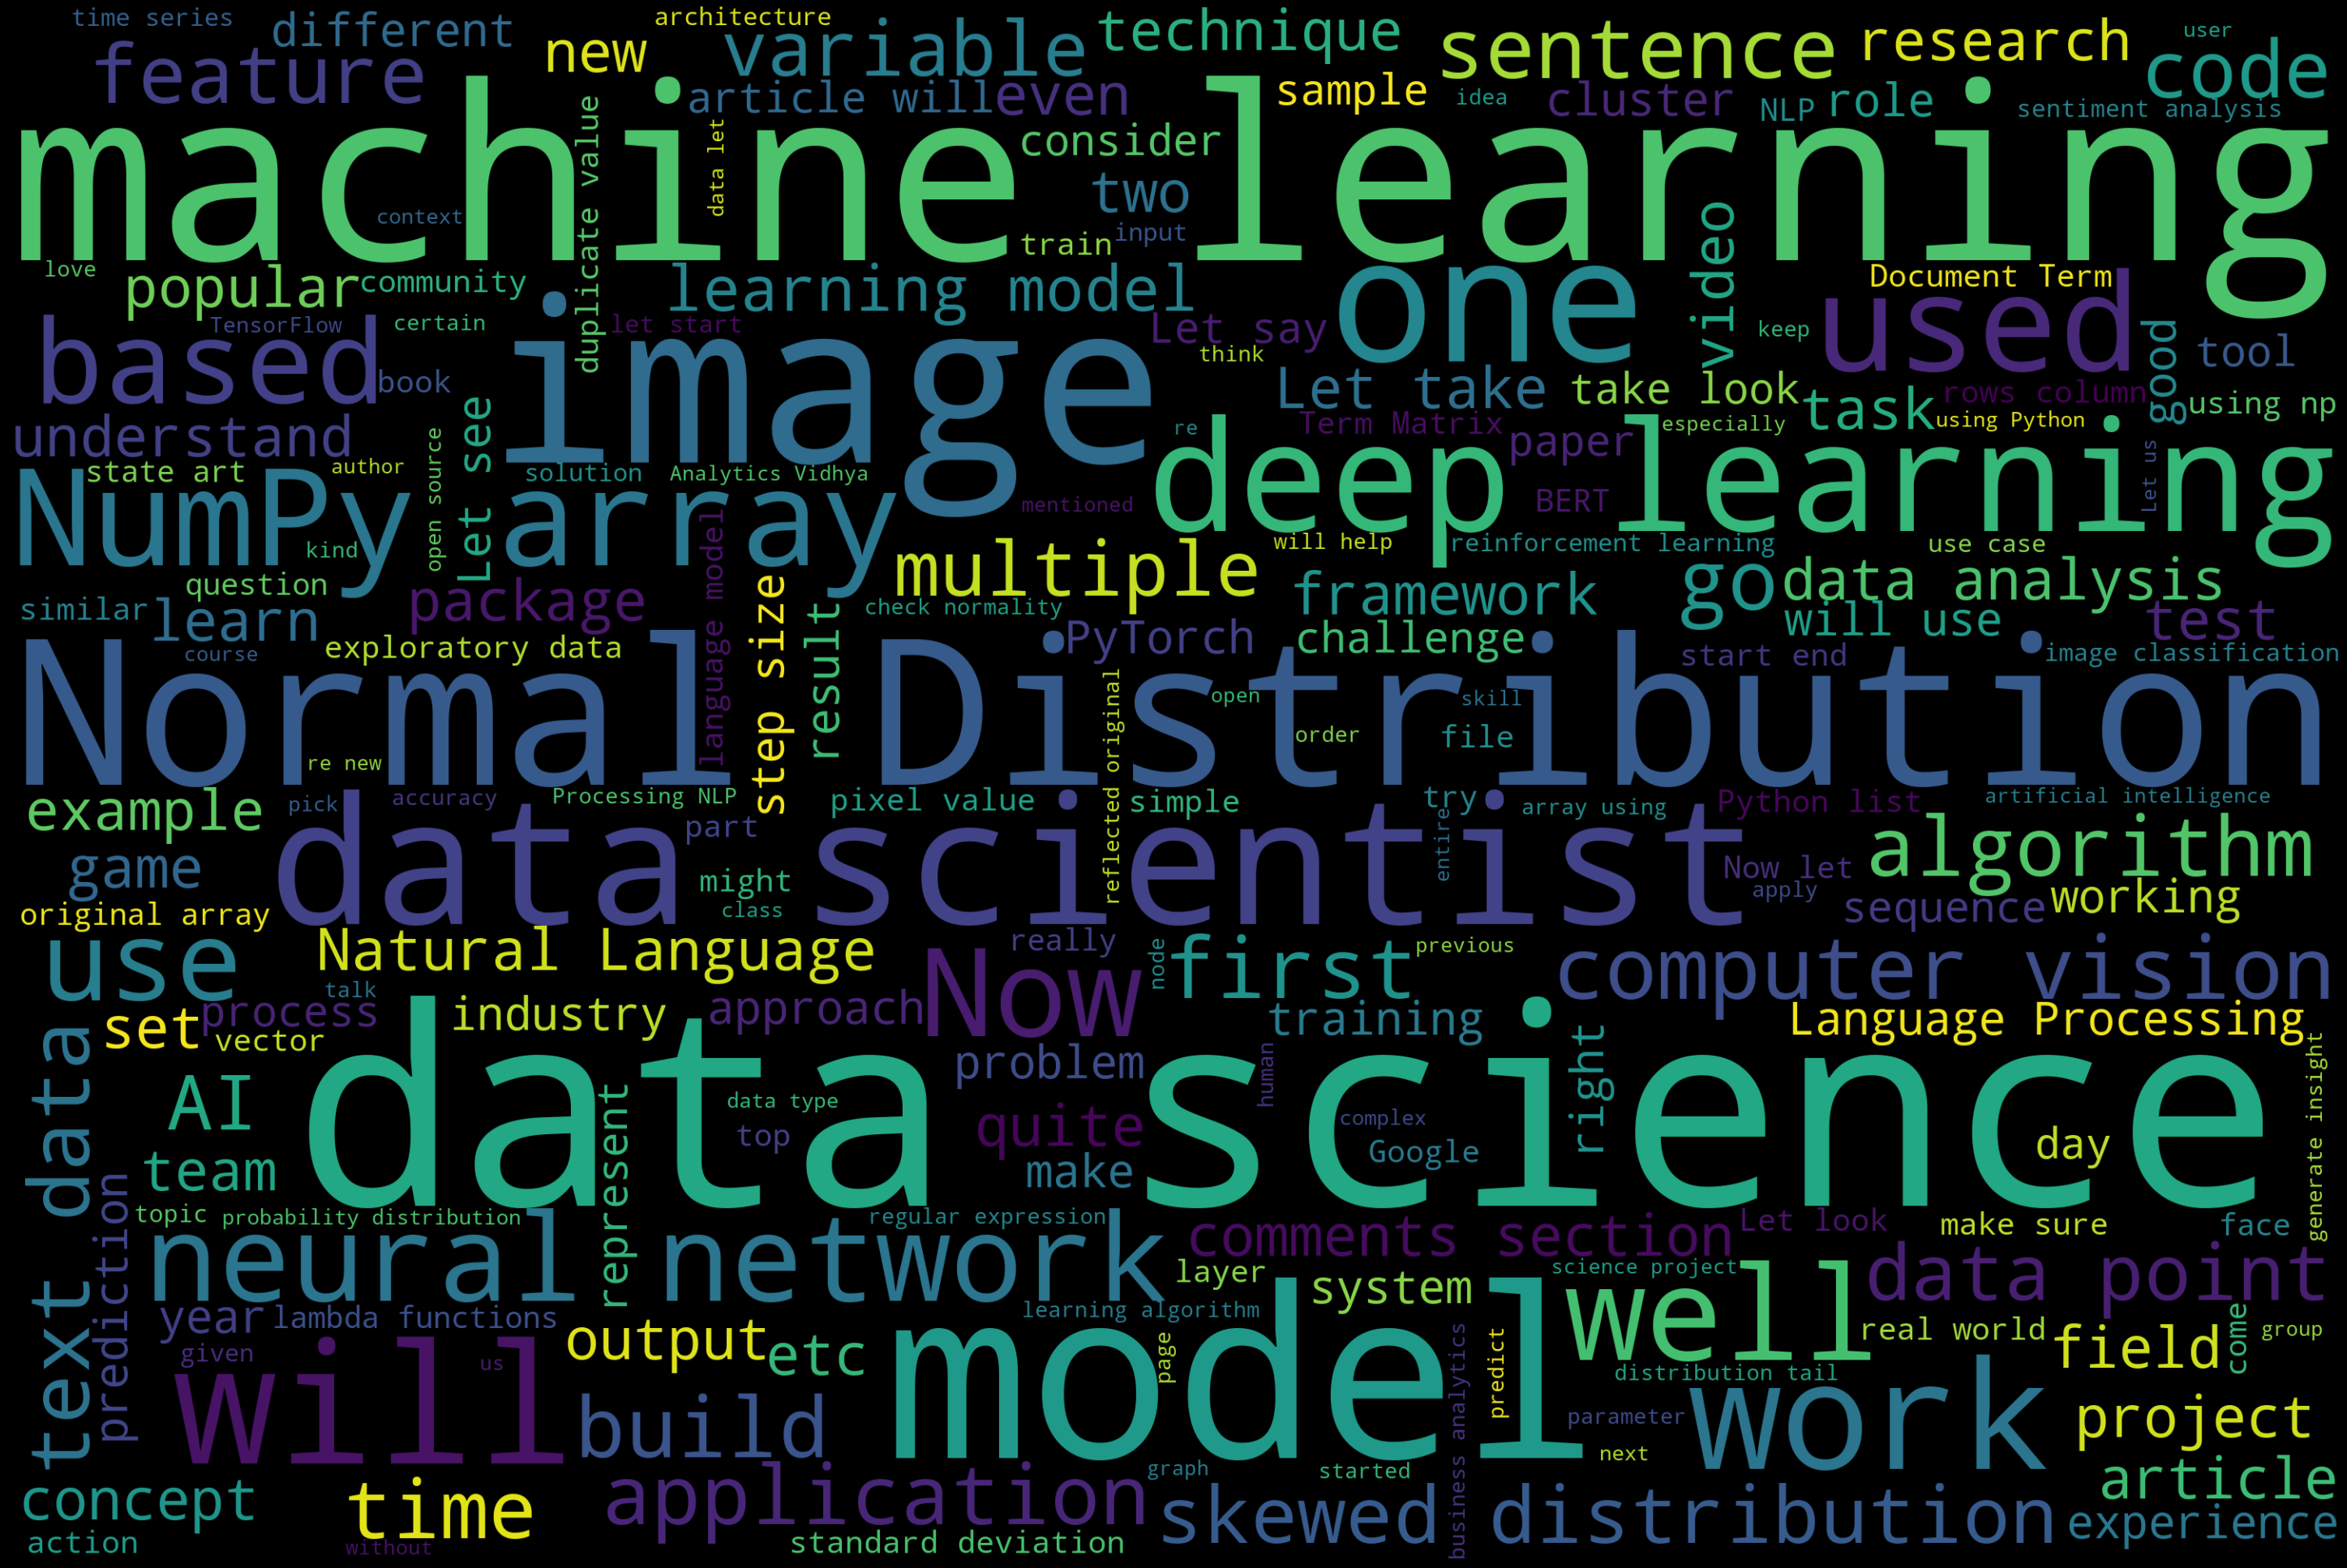

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = articles_df3["Content"].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Breaking down the above Web Scraping part

In [180]:
link="https://www.analyticsvidhya.com/blog/2019/"

In [181]:
page = requests.get(link ,headers={'user-agent':user_agent.chrome})

In [182]:
soup = BeautifulSoup(page.content)

In [183]:
soup

<!DOCTYPE html>
<html><head lang="en-US">
<meta content="app-id=com.analyticsvidhya.android" name="google-play-app"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=yes" name="viewport"/>
<link href="https://www.analyticsvidhya.com/xmlrpc.php" rel="pingback"/>
<link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" id="favicon" rel="icon" type="image/png"/><link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" rel="apple-touch-icon"/><link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" rel="apple-touch-icon" sizes="76x76"/><link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" rel="apple-touch-icon" sizes=

In [184]:
page.close()

In [185]:
link_title=soup.find_all("h3",{"class":"entry-title"})

#### Here it will extract the part from h3 class="entry title" as it contains the title and the link to the post and the introduction to the post

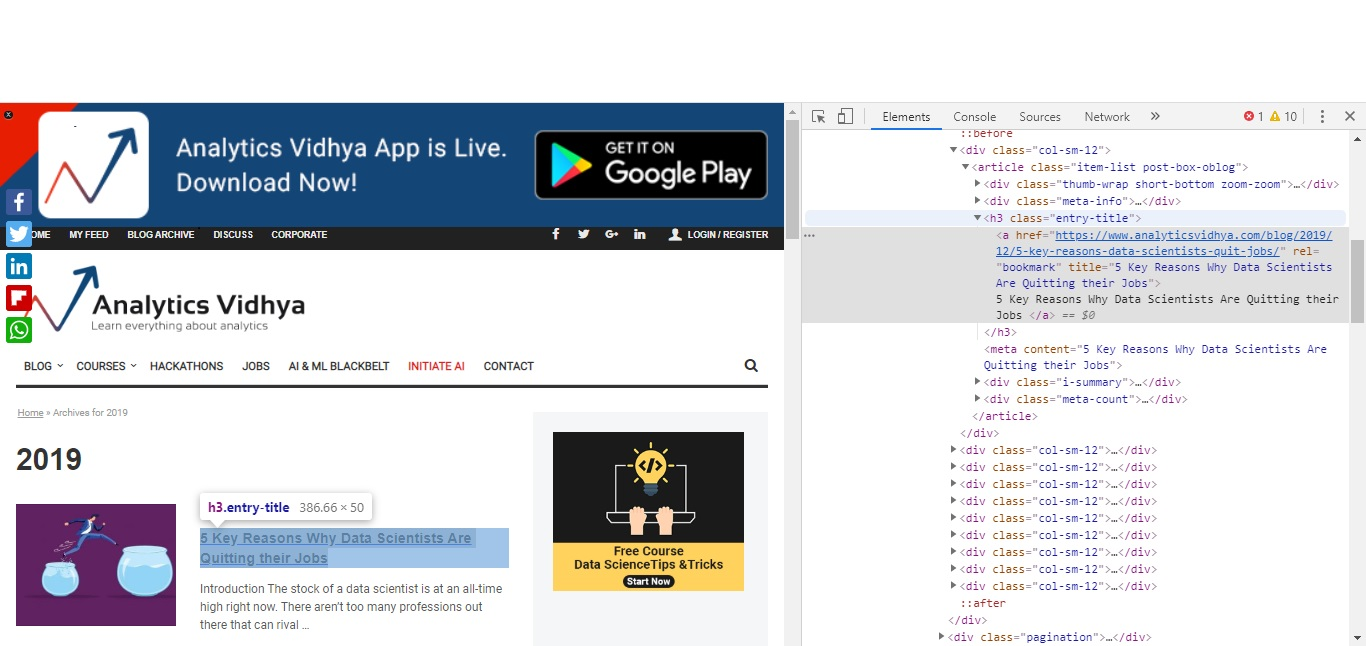

In [186]:
for item in link_title:
    print(item)
    print("----------------------------------------------------")

<h3 class="entry-title">
<a href="https://www.analyticsvidhya.com/blog/2019/12/5-key-reasons-data-scientists-quit-jobs/" rel="bookmark" title="5 Key Reasons Why Data Scientists Are Quitting their Jobs">
5 Key Reasons Why Data Scientists Are Quitting their Jobs </a>
</h3>
----------------------------------------------------
<h3 class="entry-title">
<a href="https://www.analyticsvidhya.com/blog/2019/12/five-weird-data-science-uses/" rel="bookmark" title="5 Weird and Hilarious Uses of Data Science">
5 Weird and Hilarious Uses of Data Science </a>
</h3>
----------------------------------------------------
<h3 class="entry-title">
<a href="https://www.analyticsvidhya.com/blog/2019/12/2020-trends-machine-learning-deep-learning/" rel="bookmark" title="2019 In-Review and Trends for 2020 – A Technical Overview of Machine Learning and Deep Learning!">
2019 In-Review and Trends for 2020 – A Technical Overview of Machine Learning and Deep Learning! </a>
</h3>
--------------------------------------

#### Inorder to extract the article link we need to find out where the link exist, here link located in <a href

In [187]:
link1=re.search(r"<a href=.*rel=",str(item))

In [189]:
link1.group()

'<a href="https://www.analyticsvidhya.com/blog/2020/04/excel-tips-tricks-data-analysis/" rel='

#### Removing unwanted text from the link

In [190]:
article_link=re.sub('<a href="','',re.sub('" rel=','',link1.group()))
article_link

'https://www.analyticsvidhya.com/blog/2020/04/excel-tips-tricks-data-analysis/'

#### Here it iterates through all the articles and extract the link from it and store it in the variable named articles_link

In [193]:
articles_link=[]

for item in link_title:
    link1=re.search(r"<a href=.*rel=",str(item))
    if link1 is not None:
        article_link=re.sub('<a href="','',re.sub('" rel=','',link1.group()))
    else:
        article_link=None
    articles_link.append(article_link) 

#### Now we need to extract Title of the article

In [197]:
title=re.search(r".*</a>",str(item))
title.group()

'10+ Simple Yet Powerful Excel Tricks for Data Analysis </a>'

In [198]:
article_name=re.sub(" </a>","",title.group())
article_name

'10+ Simple Yet Powerful Excel Tricks for Data Analysis'

In [199]:
articles_title=[]
for item in link_title:
        
    title=re.search(r".*</a>",str(item))
    if title is not None:
        article_name=re.sub(" </a>","",title.group())
    else:
        article_name=None

    articles_title.append(article_name)

#### Now we need to extract the content from particular article link

In [22]:
#article = requests.get(article_link)
article = requests.get("https://www.analyticsvidhya.com/blog/2020/04/excel-tips-tricks-data-analysis/")

In [23]:
article_content = article.content

In [24]:
soup_article = BeautifulSoup(article_content)
soup_article

<!DOCTYPE html>
<html><head lang="en-US">
<meta content="app-id=com.analyticsvidhya.android" name="google-play-app"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=yes" name="viewport"/>
<link href="https://www.analyticsvidhya.com/xmlrpc.php" rel="pingback"/>
<link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" id="favicon" rel="icon" type="image/png"/><link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" rel="apple-touch-icon"/><link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" rel="apple-touch-icon" sizes="76x76"/><link href="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/logo_square_v2.jpg" rel="apple-touch-icon" sizes=

In [25]:
body = soup_article.find_all('div', class_='text-content')

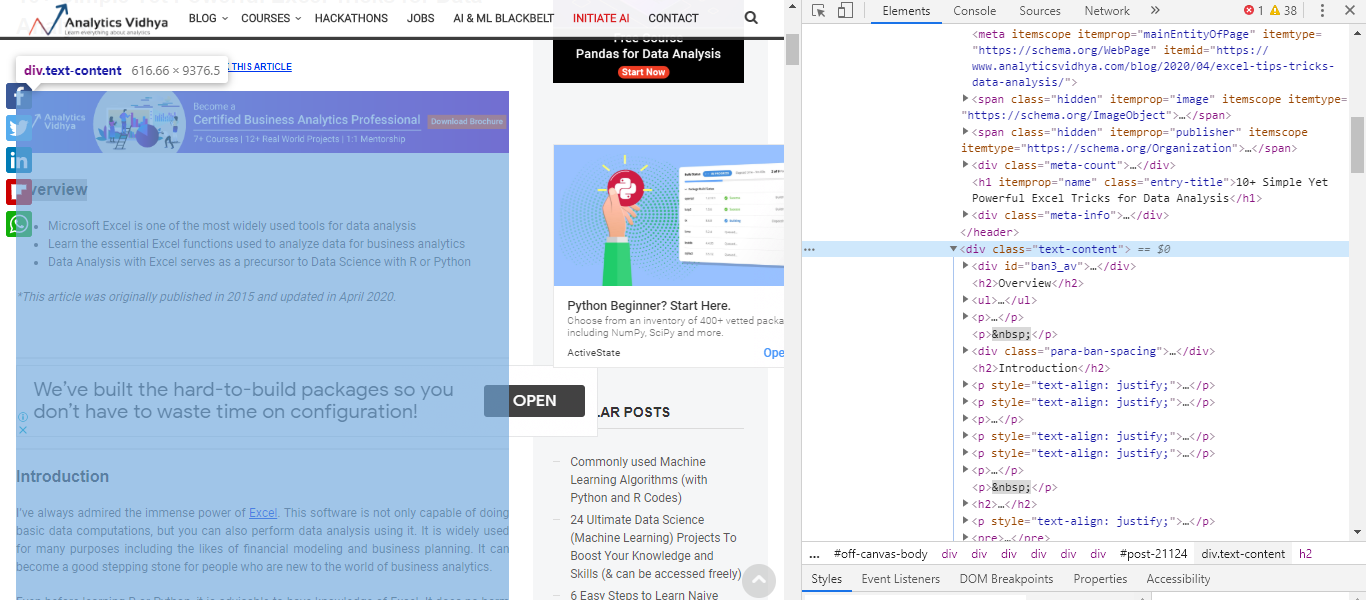

In [26]:
body

[<div class="text-content">
 <div id="ban3_av"></div>
 <h2>Overview</h2>
 <ul>
 <li>Microsoft Excel is one of the most widely used tools for data analysis</li>
 <li>Learn the essential Excel functions used to analyze data for business analytics</li>
 <li>Data Analysis with Excel serves as a precursor to Data Science with R or Python</li>
 </ul>
 <p><em>*This article was originally published in 2015 and updated in April 2020.</em></p>
 <p> </p>
 <div class="para-ban-spacing"><script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
 <ins class="adsbygoogle" data-ad-client="ca-pub-5229672700622157" data-ad-slot="7938033629" style="display:inline-block;width:728px;height:90px"></ins>
 <script>
 (adsbygoogle = window.adsbygoogle || []).push({});
 </script></div><h2>Introduction</h2>
 <p style="text-align: justify;">I’ve always admired the immense power of <a href="https://courses.analyticsvidhya.com/courses/microsoft-excel-from-beginner-to-advanced-2-0?utm_s

#### Here the text located in < p > 

In [27]:
x = body[0].find_all('p')
x

[<p><em>*This article was originally published in 2015 and updated in April 2020.</em></p>,
 <p> </p>,
 <p style="text-align: justify;">I’ve always admired the immense power of <a href="https://courses.analyticsvidhya.com/courses/microsoft-excel-from-beginner-to-advanced-2-0?utm_source=blog&amp;utm_medium=excel-tips-tricks-data-analysis" rel="noopener noreferrer" target="_blank">Excel</a>. This software is not only capable of doing basic data computations, but you can also perform data analysis using it. It is widely used for many purposes including the likes of financial modeling and business planning. It can become a good stepping stone for people who are new to the world of business analytics.</p>,
 <p style="text-align: justify;">Even before learning R or Python, it is advisable to have knowledge of Excel. It does no harm to add Excel to your skillset. Excel, with its wide range of functions, visualizations, and arrays empowers you to quickly generate insights from data which would

In [28]:
len(x)

38

#### Totally 38 sentences in the article 

#### get_text() is used to return the text part from the document

In [32]:
x[0].get_text()

'*This article was originally published in 2015 and updated in April 2020.'

In [ ]:
article = requests.get(article_link)
        article_content = article.content
        soup_article = BeautifulSoup(article_content)
        body = soup_article.find_all('div', class_='main-content')
        x = body[0].find_all('p')
        list_paragraphs = []
        for p in np.arange(0, len(x)):
            paragraph = x[p].get_text()
            list_paragraphs.append(paragraph)
            final_article = " ".join(list_paragraphs)

#### once extracted we append it to the empty list and finally join all the list. Now the article content is ready. It will iterate through every article in page one and based on the link it will extract the contents inside it and then it will move on to the next page